In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'peak_fwhm'

In [6]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


### peak_fwhm_150_2022-11-18

In [7]:
!ls $data_base_dir

Screen Shot 2022-11-20 at 10.35.04 AM.png
peak_fwhm_150_2022-11-18_images
peak_fwhm_150_2022-11-18_steps
peak_fwhm_autofocusing.ini
peak_fwhm_optimization_final_150_2022-11-18_16:24.pkl
peak_fwhm_ref_150_2022-11-18_images
peak_fwhm_ref_150_2022-11-18_steps
peak_fwhm_ref_150_2022-11-20_images
peak_fwhm_ref_150_2022-11-20_steps
peak_fwhm_ref_autofocusing.ini
peak_fwhm_ref_autofocusing_2022-11-18.ini
peak_fwhm_ref_autofocusing_2022-11-20.ini
peak_fwhm_ref_optimization_final_150_2022-11-18_01:23.pkl
peak_fwhm_ref_optimization_final_150_2022-11-20_14:09.gz
preliminary


In [151]:
log_file = Path(data_base_dir / 'peak_fwhm_optimization_final_150_2022-11-18_16:24.pkl')
log_file.exists()

True

In [152]:
hist_dir = Path(data_base_dir / 'peak_fwhm_150_2022-11-18_steps')
hist_dir.exists()

True

In [153]:
study = analysis.create_study_from_trials(log_file)

[I 2022-11-21 01:25:56,097] A new study created in memory with name: no-name-3f1ce6b2-27f7-425f-bc9e-bfdad2535a45


Assuming minimization for all objectives.


In [154]:
n_steps = len(study.trials)

In [155]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir)

In [156]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [157]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[128, 144, 74, 142]
83 [0.0022991581379456076, 0.010281921579573678]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38943231529145483, 'h_fwhm': 0.008453913849004735, 'h_centroid': 0.0011973220272326612, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.45632146129905654, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.005934315588865258, 'v_peak': 0.0003251270027353485, 'integral_intensity': 286.68511159490856, 'peak_intensity': 65442.863, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.010281921579573678


Trial number 62
Trial values: peak_distance 4.598e-04 fwhm 1.444e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3892906873125694, 'h_fwhm': 0.008453913849004735, 'h_centroid': 0.0013383477421216317, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45620272153959684, 'v_fwhm': 0.011704572098476529, 'v_centroid': 0.005691214406923217, 'v_peak': 0.0003251270027353485, 'integral_intensity': 286.9330095527904, 'peak_intensity': 58048.715, 'gaussian_fit': {}}}
Actual fwhm 0.014438340187668017


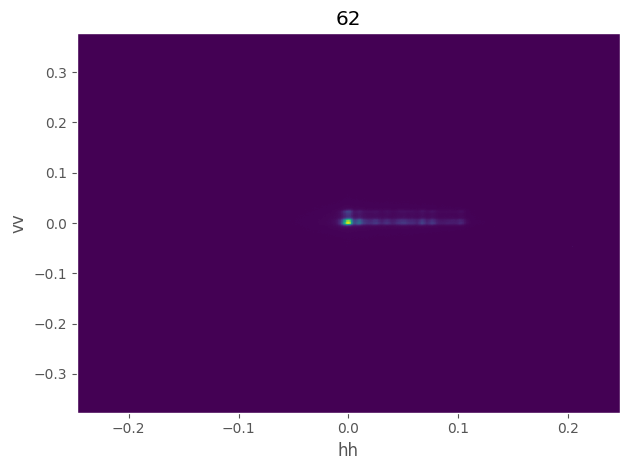

Trial number 83
Trial values: peak_distance 2.299e-03 fwhm 1.028e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38943231529145483, 'h_fwhm': 0.008453913849004735, 'h_centroid': 0.0011973220272326612, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.45632146129905654, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.005934315588865258, 'v_peak': 0.0003251270027353485, 'integral_intensity': 286.68511159490856, 'peak_intensity': 65442.863, 'gaussian_fit': {}}}
Actual fwhm 0.010281921579573678


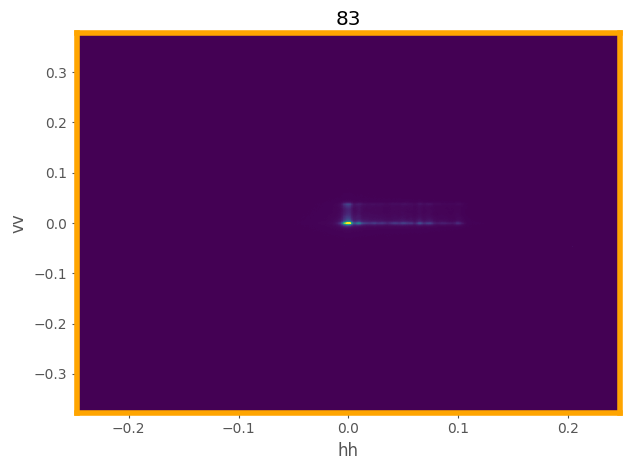

Trial number 89
Trial values: peak_distance 2.575e-02 fwhm 1.016e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38936594225028803, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.00048685750186083787, 'h_peak': -0.017883279295970386, 'v_sigma': 0.45630904732723326, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.007293519986659447, 'v_peak': -0.01853223915592033, 'integral_intensity': 286.94242751014224, 'peak_intensity': 64957.13, 'gaussian_fit': {}}}
Actual fwhm 0.01015772610582563


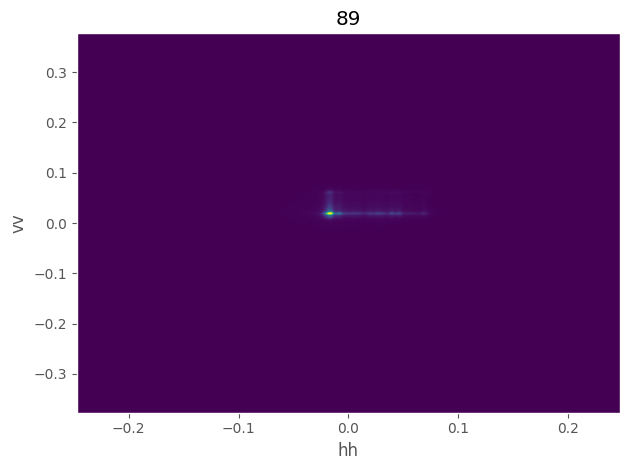

Trial number 150
Trial values: peak_distance 1.896e-03 fwhm 1.150e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38975957226596647, 'h_fwhm': 0.008453913849004735, 'h_centroid': 0.0009217042426718225, 'h_peak': -0.0016257526632700889, 'v_sigma': 0.4567274848340016, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.005985237293834794, 'v_peak': -0.000975381008206341, 'integral_intensity': 286.5060892159361, 'peak_intensity': 64079.8, 'gaussian_fit': {}}}
Actual fwhm 0.011504617267917006


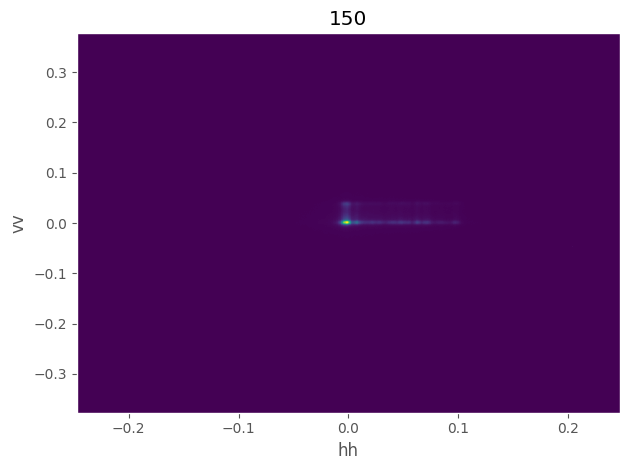

In [177]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [171]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak', 'fwhm'])

In [172]:
pareto_df

,number,peak,fwhm,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
62,62,0.000460,0.014438,-0.000325,0.000325,0.008454,0.011705,58048.714844
83,83,0.002299,0.010282,-0.002276,0.000325,0.008454,0.005852,65442.863281
89,89,0.025754,0.010158,-0.017883,-0.018532,0.007804,0.006503,64957.128906
150,150,0.001896,0.011505,-0.001626,-0.000975,0.008454,0.007803,64079.800781


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/646137518.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)


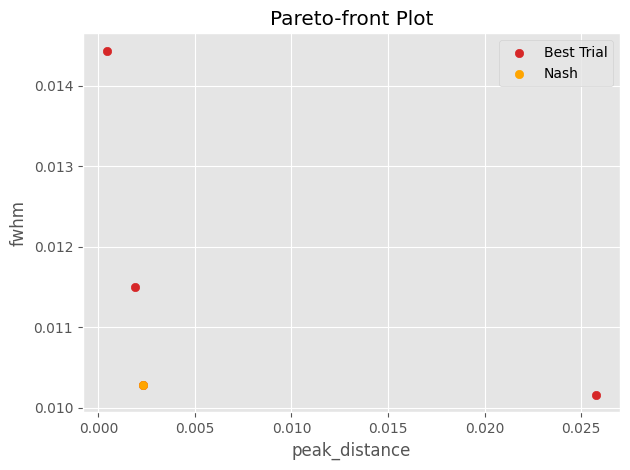

In [175]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


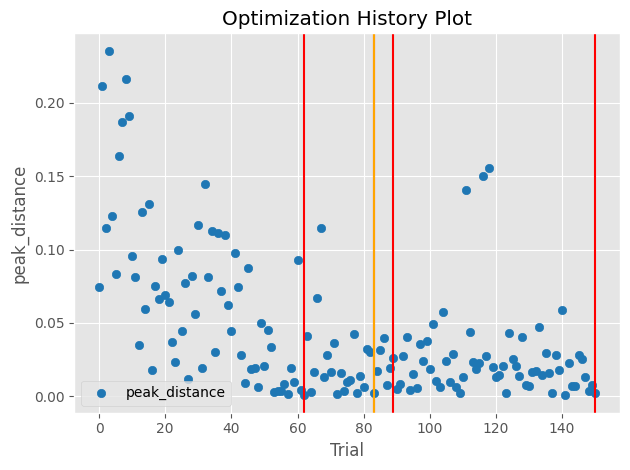

In [179]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/2080699662.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


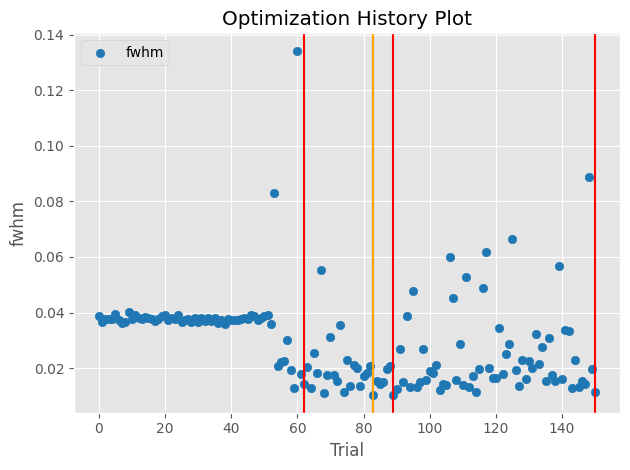

In [180]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [36]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


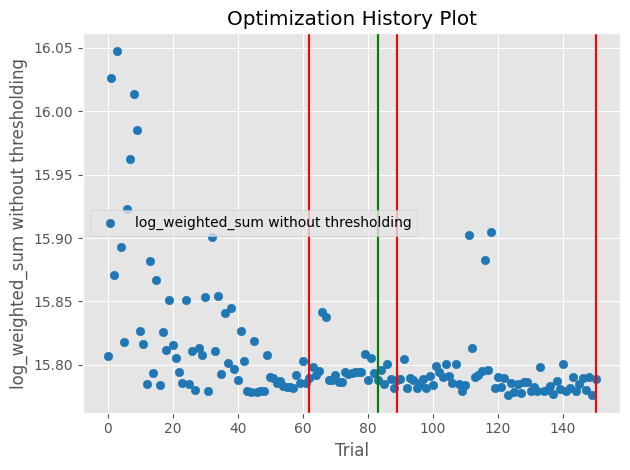

In [37]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


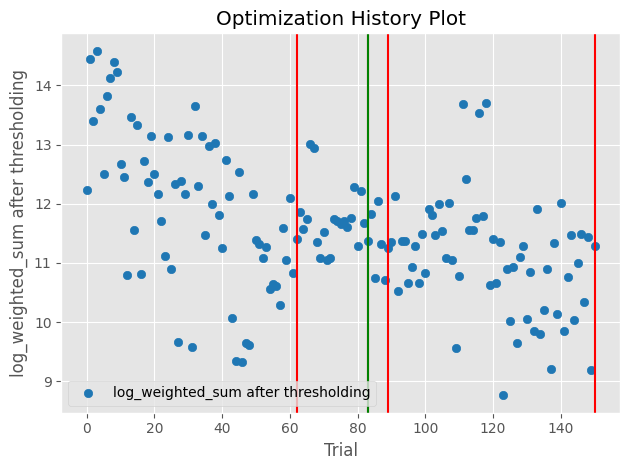

In [38]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [39]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

123


62 [0.00045981565522807544, 11.397871664219558]


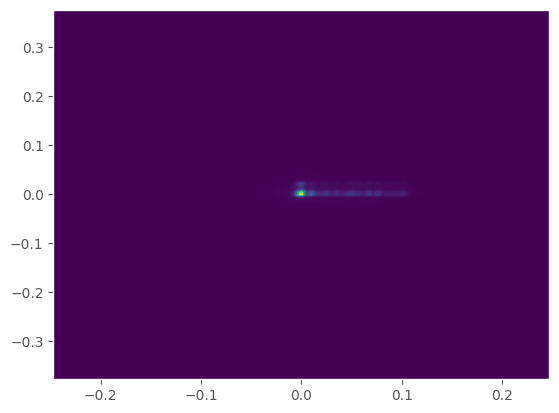

123 [0.0024761212909397735, 8.760805712195436]


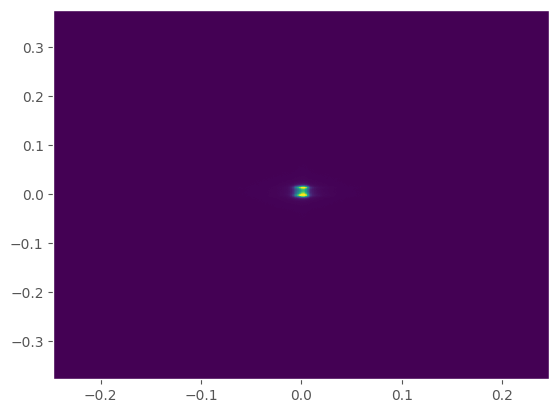

141 [0.00045981565522817996, 9.84799868912044]


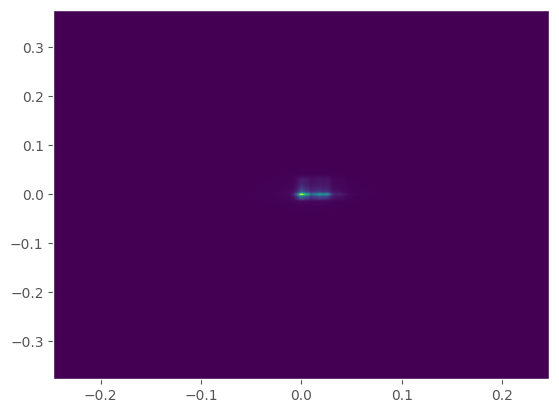

In [40]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [41]:
study.directions

[<StudyDirection.MINIMIZE: 1>, <StudyDirection.MINIMIZE: 1>]

In [44]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

137 103


57 [0.0013794469656845396, 0.030125034453713975, 10.284119870188421]


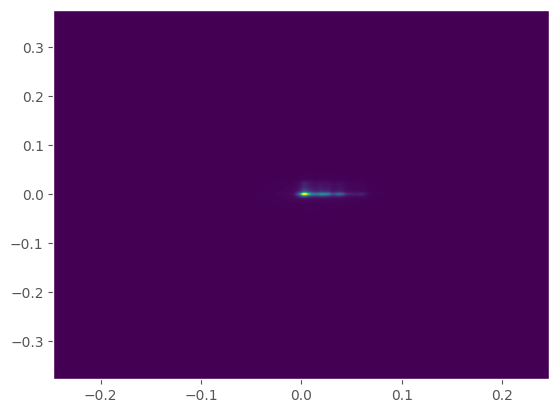

59 [0.009872955268457634, 0.01287483834638968, 11.052595423225927]


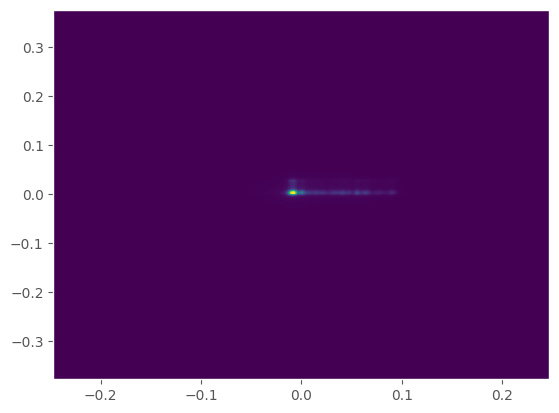

62 [0.00045981565522807544, 0.014438340187668017, 11.397871664219558]


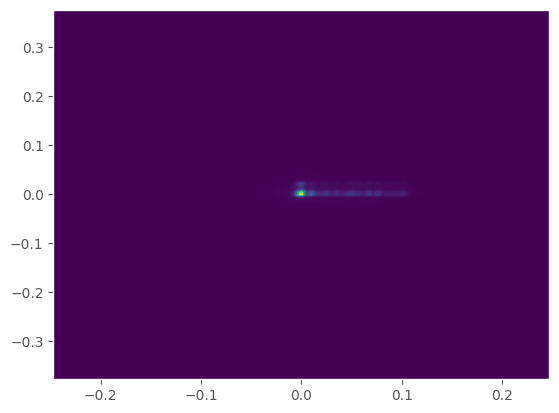

68 [0.013174736351167317, 0.0111879290473748, 11.352185447503043]


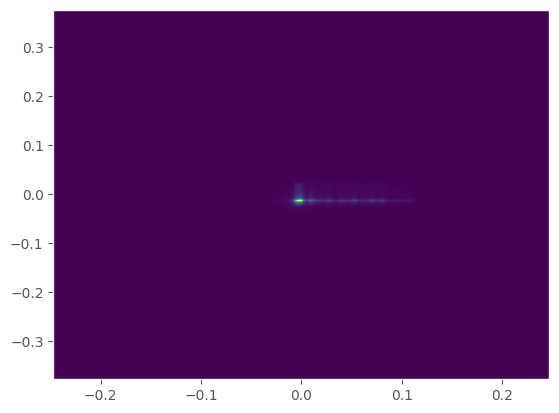

72 [0.0013794469656845396, 0.015511766698927357, 11.08114914356922]


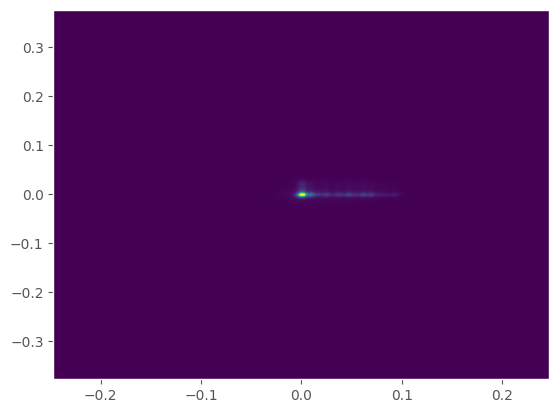

83 [0.0022991581379456076, 0.010281921579573678, 11.378402162600578]


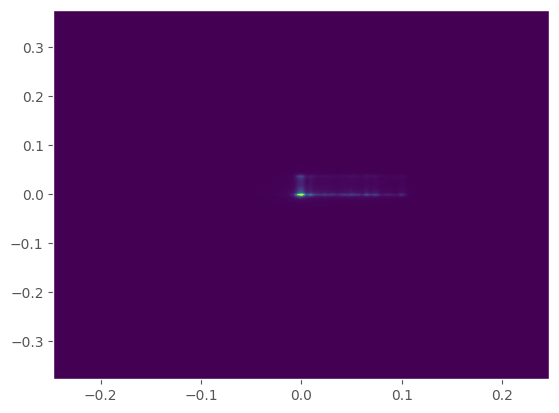

89 [0.025753748591416933, 0.01015772610582563, 11.249788371641612]


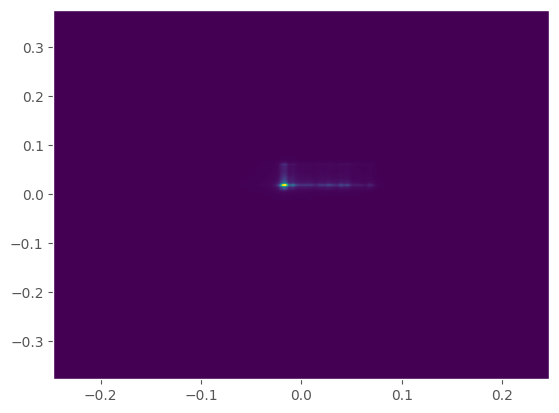

96 [0.005382129348747131, 0.01316731177190838, 10.932139883745151]


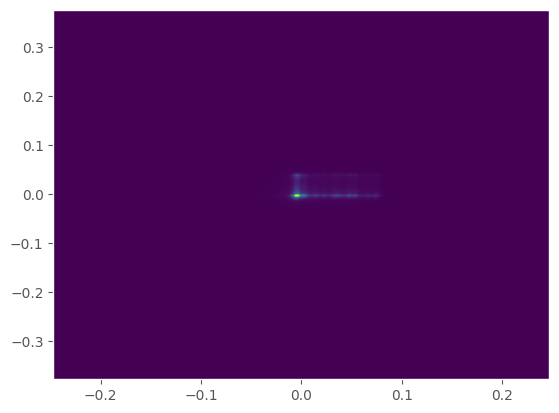

110 [0.012751438604338918, 0.0140674582098654, 10.778276265439182]


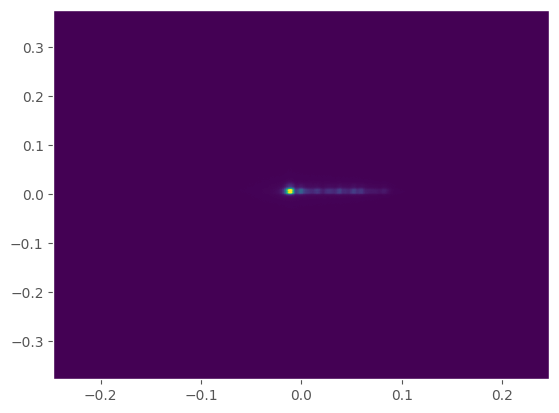

123 [0.0024761212909397735, 0.025016167413906987, 8.760805712195436]


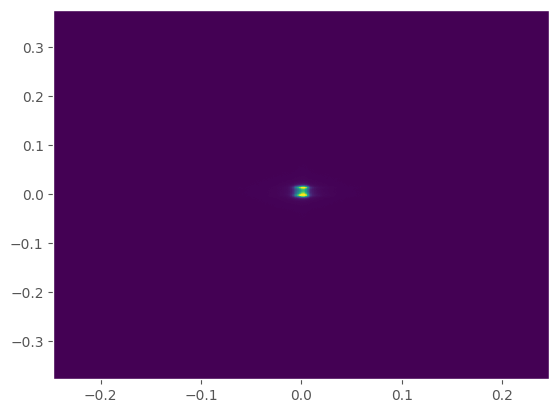

127 [0.014075662462790127, 0.013717846075188507, 9.647224243387154]


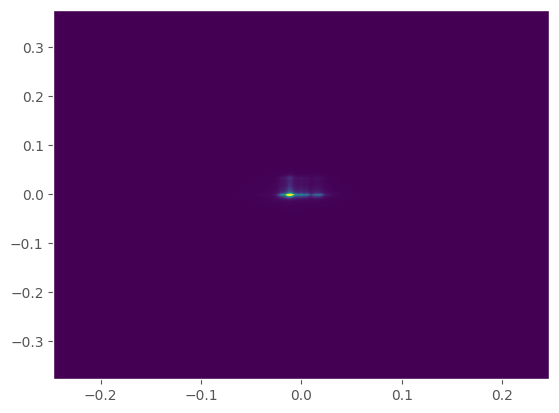

137 [0.0024762448761266446, 0.017497245446776832, 9.213707326153582]


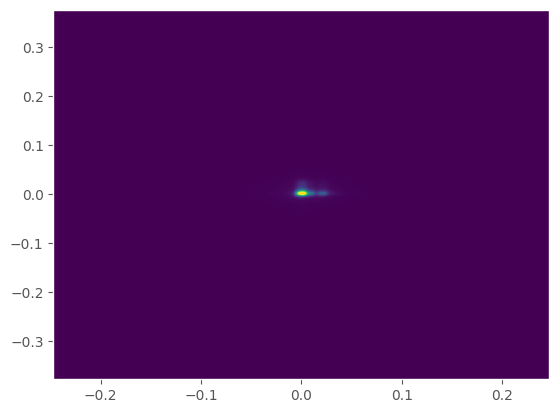

141 [0.00045981565522817996, 0.0335959373251829, 9.84799868912044]


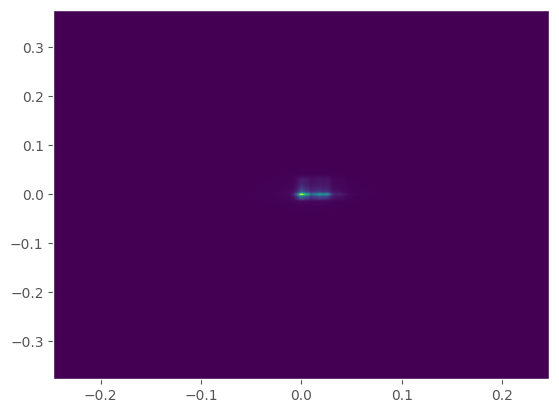

147 [0.013366394203501494, 0.014320976561357817, 10.346148437231399]


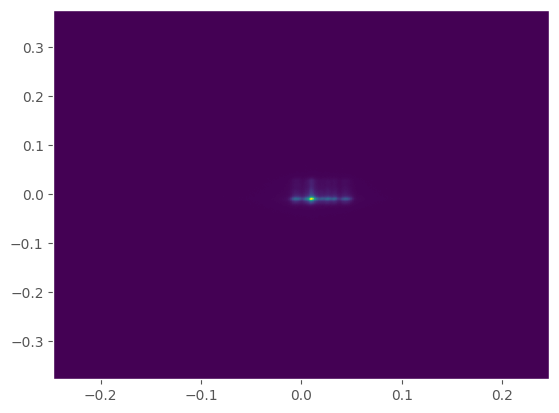

149 [0.007428363872819592, 0.01985243529149775, 9.182933017053406]


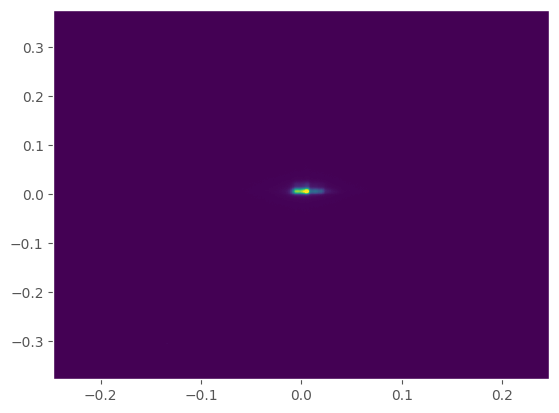

150 [0.001895900797325484, 0.011504617267917006, 11.28723987184283]


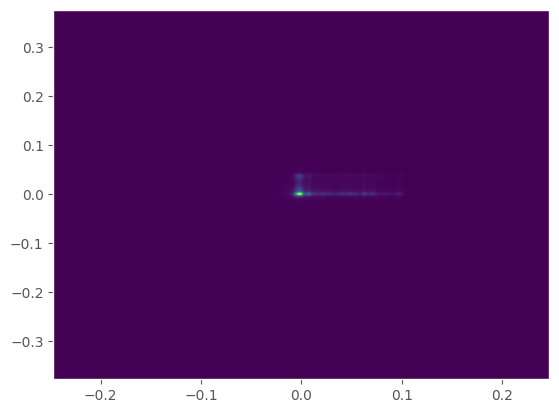

In [45]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

### peak_fwhm_ref_150_2022-11-18  - This trial is invalid because we are using the same reference beam as initialization

### peak_fwhm_ref_150_2022-11-20

In [182]:
!ls $data_base_dir

Screen Shot 2022-11-20 at 10.35.04 AM.png
peak_fwhm_150_2022-11-18_images
peak_fwhm_150_2022-11-18_steps
peak_fwhm_autofocusing.ini
peak_fwhm_optimization_final_150_2022-11-18_16:24.pkl
peak_fwhm_ref_150_2022-11-18_images
peak_fwhm_ref_150_2022-11-18_steps
peak_fwhm_ref_150_2022-11-20_images
peak_fwhm_ref_150_2022-11-20_steps
peak_fwhm_ref_autofocusing.ini
peak_fwhm_ref_autofocusing_2022-11-18.ini
peak_fwhm_ref_autofocusing_2022-11-20.ini
peak_fwhm_ref_optimization_final_150_2022-11-18_01:23.pkl
peak_fwhm_ref_optimization_final_150_2022-11-20_14:09.gz
preliminary


In [187]:
!cat {data_base_dir}/peak_fwhm_ref_autofocusing_2022-11-20.ini

[Motor-Ranges]
hkb-bender-1 = -30.0, 30.0
hkb-bender-2 = -20.0, 30.0
hkb-pitch = -0.002, 0.002
hkb-translation = -0.03, 0.03
vkb-bender = -40.0, 40.0
vkb-pitch = -0.002, 0.002
vkb-translation = -0.03, 0.03
hkb-bender-threshold = 0.2
hkb-bender-n-threshold-checks = 3

[Motor-Boundaries]
boundaries-hkb-bender-1 = -200.0, -50.0
boundaries-hkb-bender-2 = -175.0, -50.0
boundaries-hkb-pitch = 0.168, 0.174
boundaries-hkb-translation = -0.5, 0.5
boundaries-vkb-bender = 0.0, 600.0
boundaries-vkb-pitch = 0.168, 0.174
boundaries-vkb-translation = -0.5, 0.5

[Optimization-Parameters]
sum-intensity-soft-constraint = 7000.0
sum-intensity-hard-constraint = 6500.0
centroid-sigma-threshold-dependency = 1
centroid-sigma-hard-thresholds-tuple = 0.01, 0.03
n-pitch-trans-motor-trials = 50
n-all-motor-trials = 100
loss-parameters = peak_distance, fwhm
log-parameters-weight = 0.25
reference-position = 0.0, 0.0
reference-size = 0.018, 0.007
moo-thresholds = 
moo-thresholds-position = 0.05
moo-thresholds-size 

In [188]:
log_file = Path(data_base_dir / 'peak_fwhm_ref_optimization_final_150_2022-11-20_14:09.gz')
log_file.exists()

True

In [189]:
hist_dir = Path(data_base_dir / 'peak_fwhm_ref_150_2022-11-20_steps')
hist_dir.exists()

True

In [190]:
study = analysis.create_study_from_trials(log_file)

[I 2022-11-21 01:41:34,636] A new study created in memory with name: no-name-671ecbf4-819d-40da-abfc-63d16cc03d87


Assuming minimization for all objectives.


In [191]:
n_steps = len(study.trials)

In [192]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [193]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [194]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[147, 133]
79 [0.00045981565522817996, 0.0014334106393386306]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


Trial number 79
Trial values: peak_distance 4.598e-04 fwhm 1.433e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}
Actual fwhm 0.01974591053691665


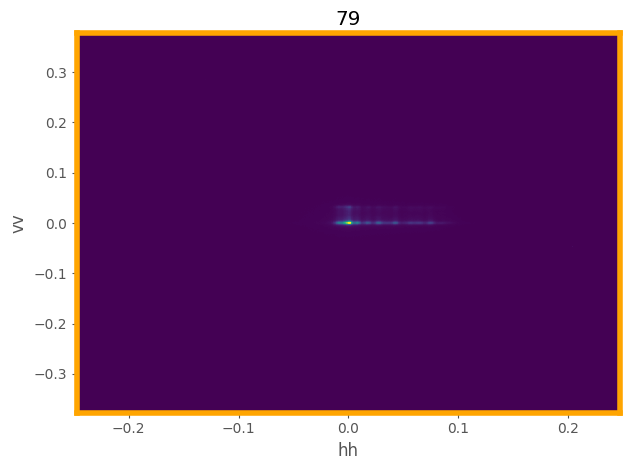

Trial number 98
Trial values: peak_distance 6.583e-03 fwhm 2.584e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906831300399076, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0005740670810941984, 'h_peak': 0.0035766558591939883, 'v_sigma': 0.45780228752575697, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.006148491649214716, 'v_peak': -0.0055271590465025494, 'integral_intensity': 285.0382951500322, 'peak_intensity': 64420.555, 'gaussian_fit': {}}}
Actual fwhm 0.019562959379688178


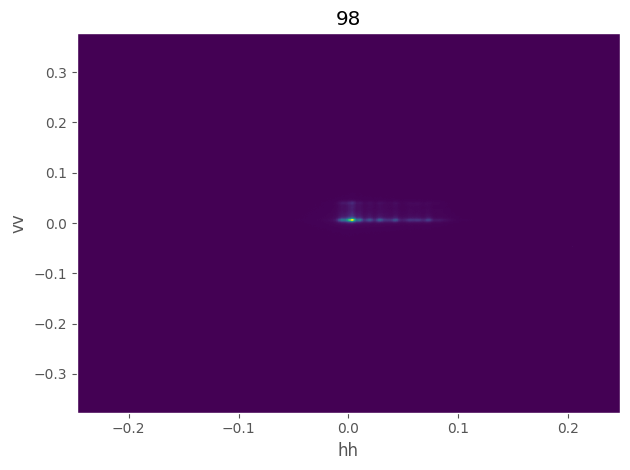

In [196]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [203]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak', 'delta_fwhm'])

In [204]:
pareto_df

,number,peak,delta_fwhm,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
79,79,0.000460,0.001433,-0.000325,-0.000325,0.018859,0.005852,65045.875000
98,98,0.006583,0.000258,0.003577,-0.005527,0.018208,0.007153,64420.554688


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/646137518.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)


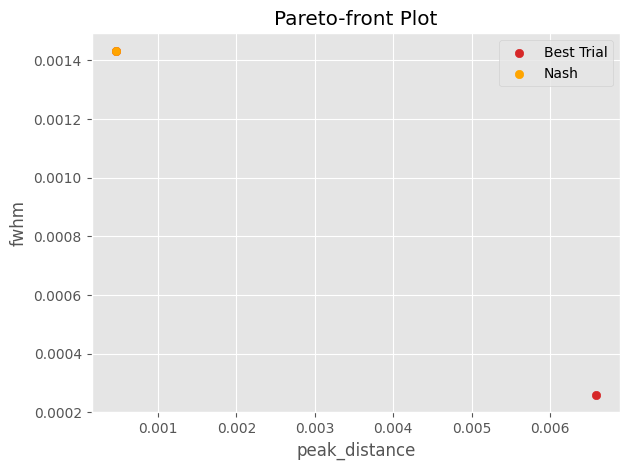

In [205]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


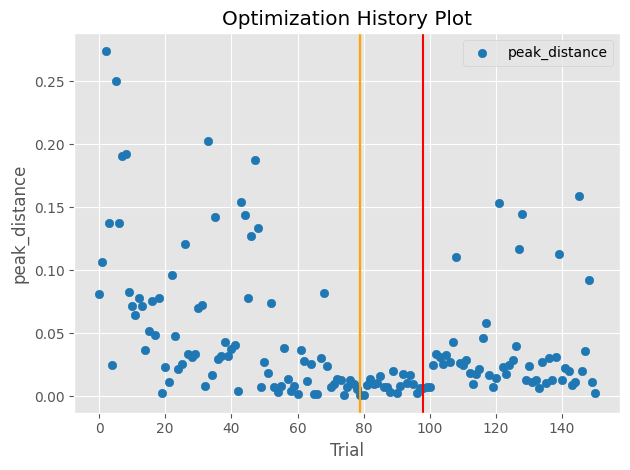

In [208]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_89192/2080699662.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


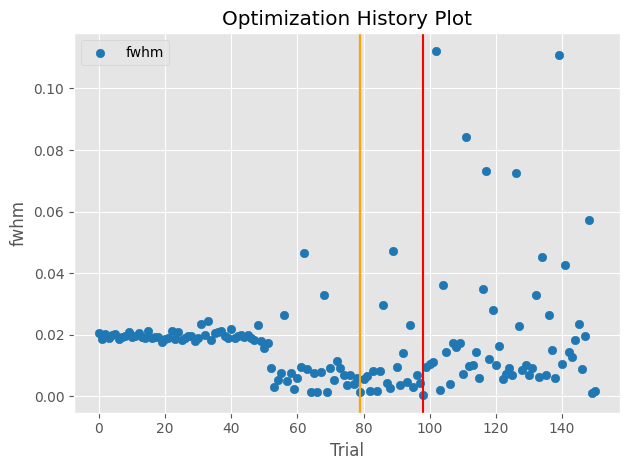

In [209]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Trial number 79
Trial values: peak_distance 4.598e-04 fwhm 1.433e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


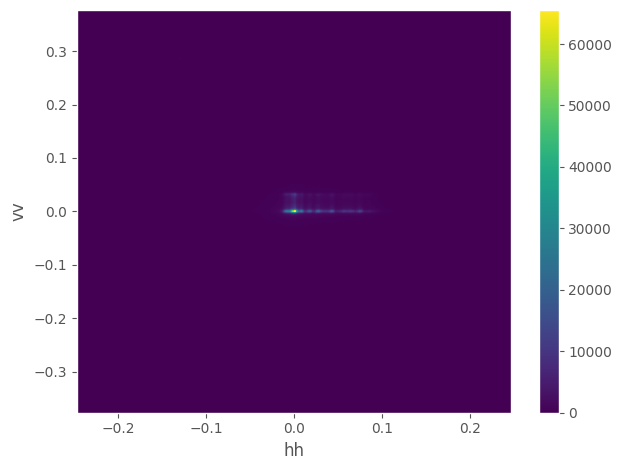

Trial number 98
Trial values: peak_distance 6.583e-03 fwhm 2.584e-04
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3906831300399076, 'h_fwhm': 0.018208429828625583, 'h_centroid': 0.0005740670810941984, 'h_peak': 0.0035766558591939883, 'v_sigma': 0.45780228752575697, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.006148491649214716, 'v_peak': -0.0055271590465025494, 'integral_intensity': 285.0382951500322, 'peak_intensity': 64420.555, 'gaussian_fit': {}}}


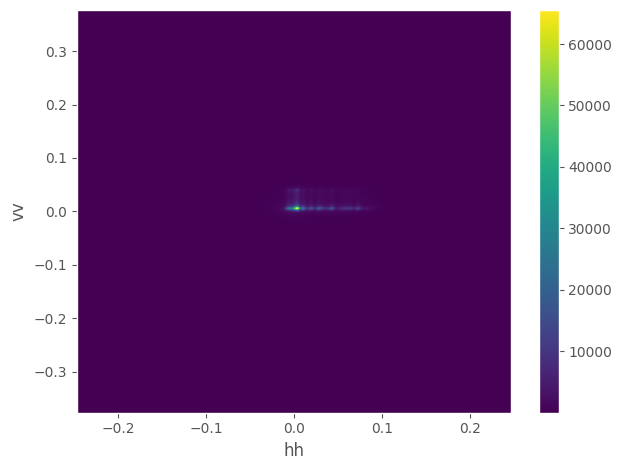

In [195]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [59]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [60]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[147, 133]
79 [0.00045981565522817996, 0.0014334106393386306]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905670010735646, 'h_fwhm': 0.01885873089393364, 'h_centroid': 0.0005517121010972792, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45766873625762505, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.0057594896642604865, 'v_peak': -0.00032512700273549627, 'integral_intensity': 284.9587837744583, 'peak_intensity': 65045.875, 'gaussian_fit': {}}}


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2856276465.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)


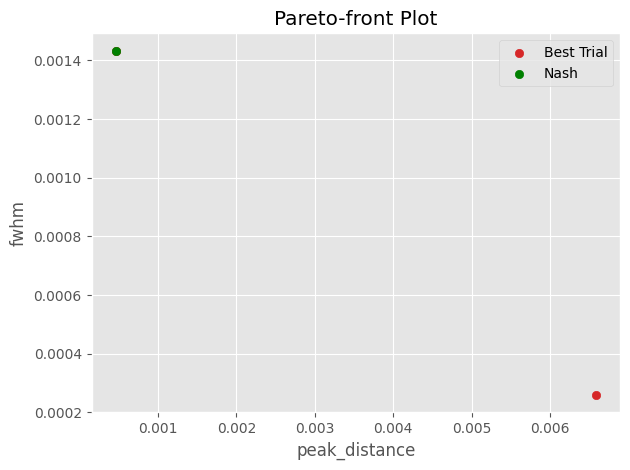

In [61]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "fwhm"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='green', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/3765395746.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


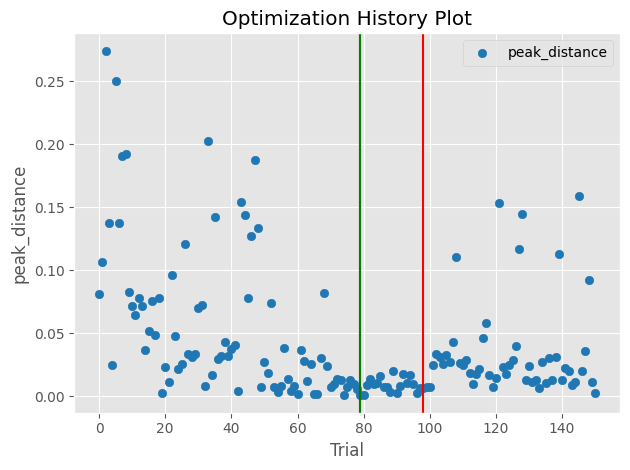

In [62]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/3053359392.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


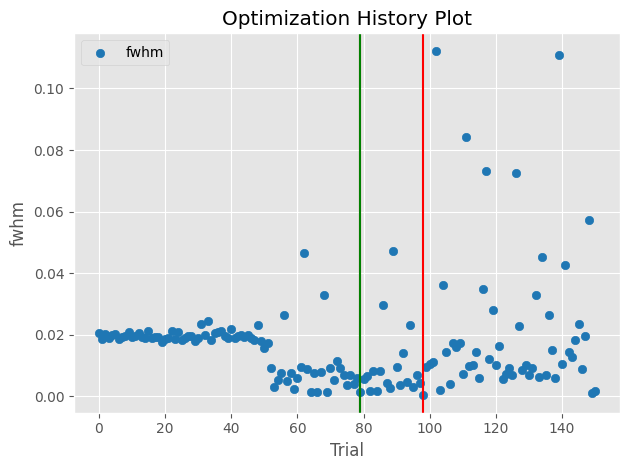

In [63]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [64]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


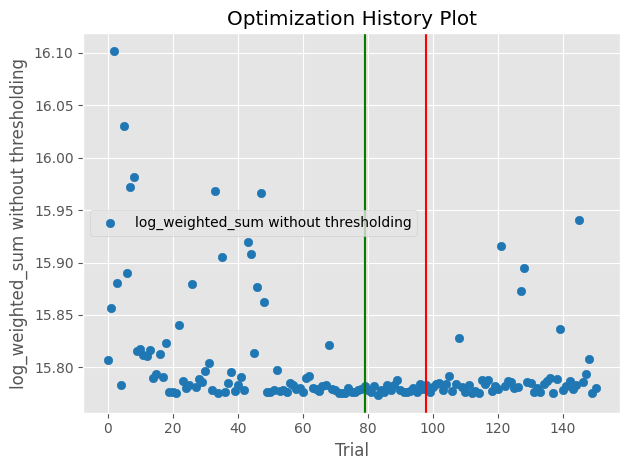

In [65]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_83911/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


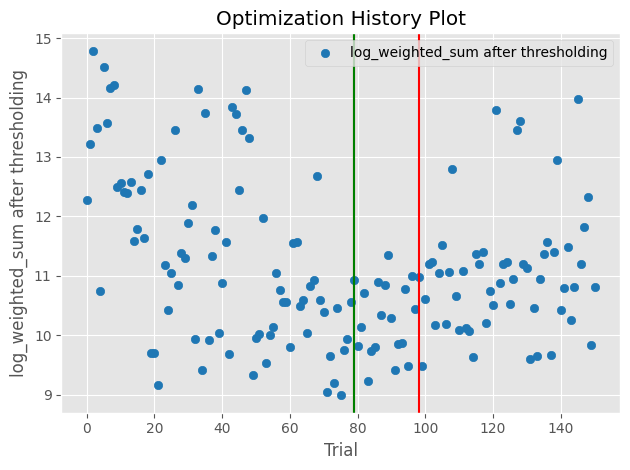

In [66]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [67]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

80


19 [0.0024761212909399093, 9.708497626283531]


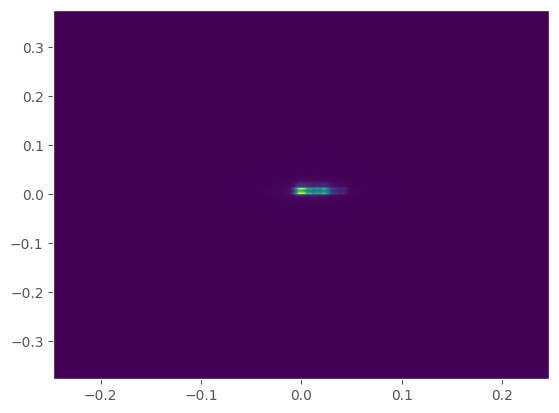

42 [0.003707119309639163, 9.685569474581012]


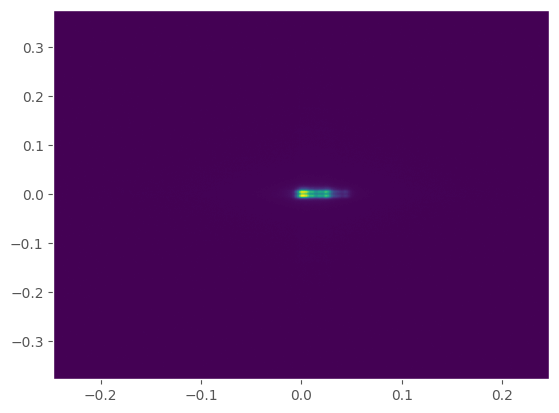

49 [0.007138387169689441, 9.326017743272079]


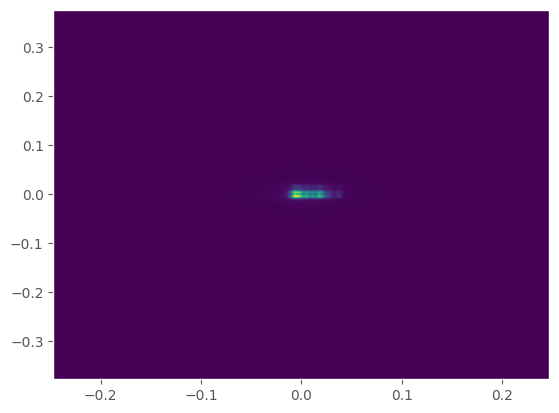

60 [0.0013794469656845396, 9.807600464924667]


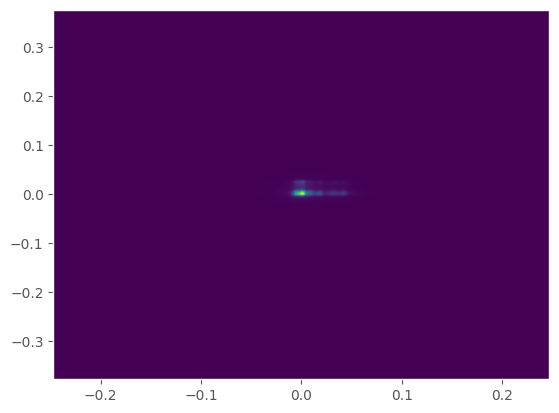

75 [0.007485158438956861, 8.986942987623676]


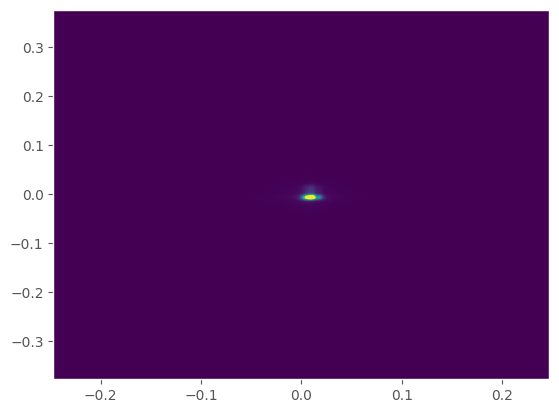

80 [0.00045981565522817996, 9.81599368346983]


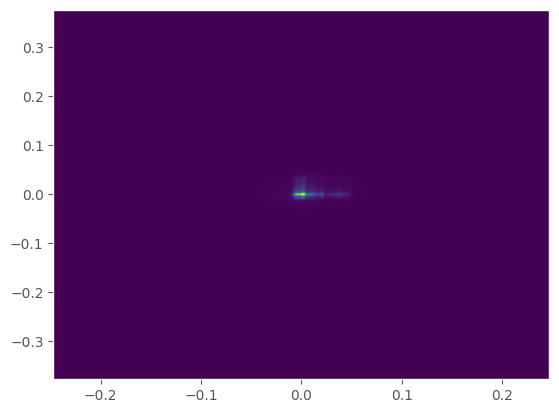

99 [0.006835404912380424, 9.481797461262829]


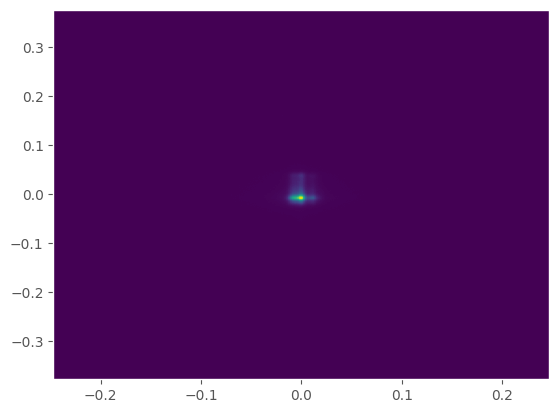

133 [0.006453853459412685, 9.658227856032969]


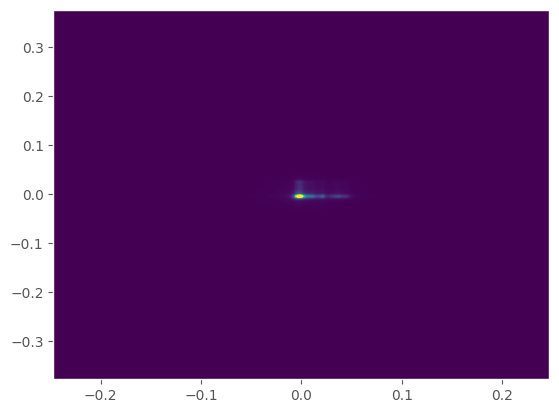

In [68]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [69]:
study.directions

[<StudyDirection.MINIMIZE: 1>, <StudyDirection.MINIMIZE: 1>]

In [70]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

80 113


19 [0.0024761212909399093, 0.03707250065187601, 9.708497626283531]


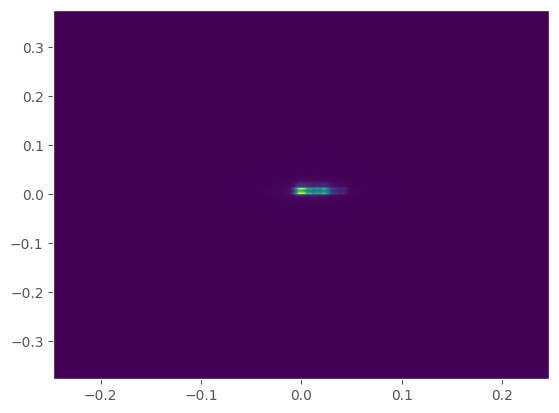

42 [0.003707119309639163, 0.038696517445970656, 9.685569474581012]


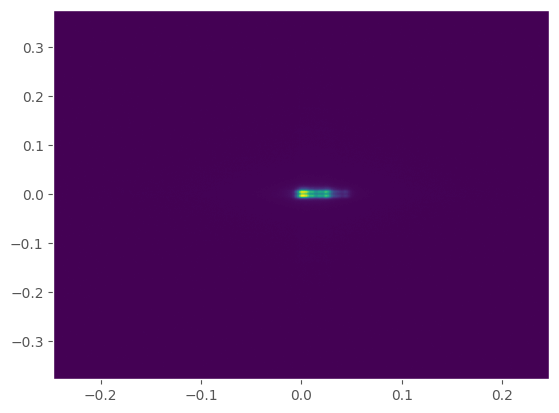

49 [0.007138387169689441, 0.03724310387604322, 9.326017743272079]


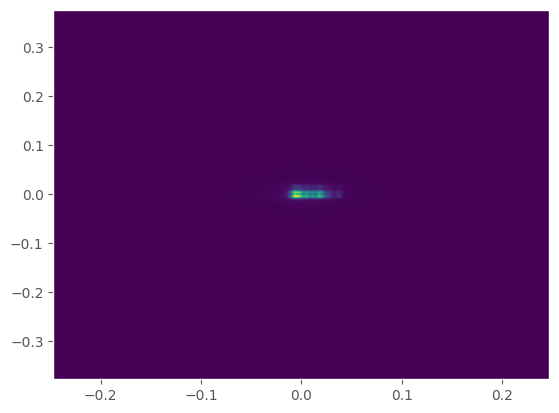

53 [0.007428363872819456, 0.016579265768677073, 9.541027331142681]


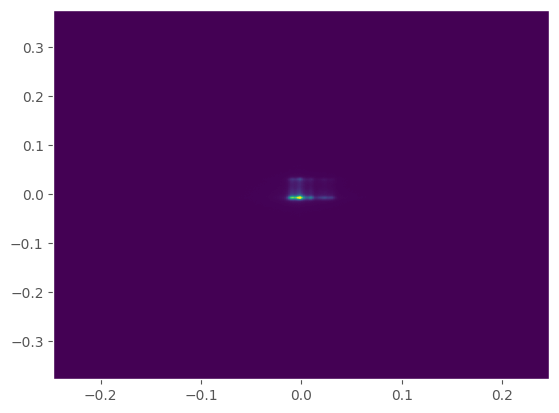

60 [0.0013794469656845396, 0.01665536369323247, 9.807600464924667]


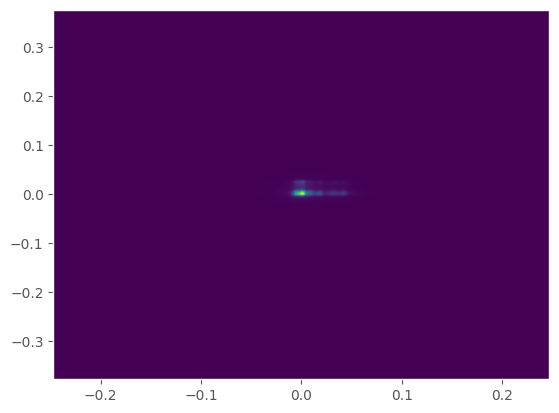

65 [0.001657944296421793, 0.013005682483180311, 10.038764882199679]


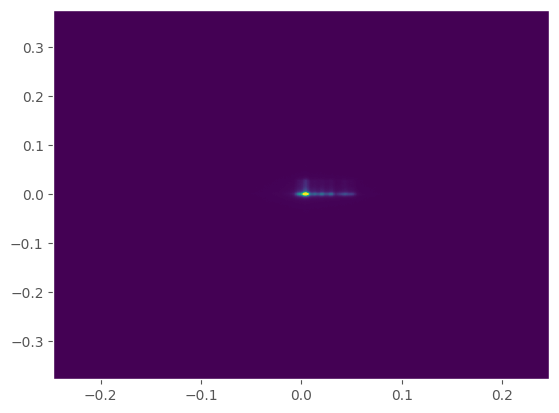

71 [0.009743099191034254, 0.015511766698927357, 9.041789789779042]


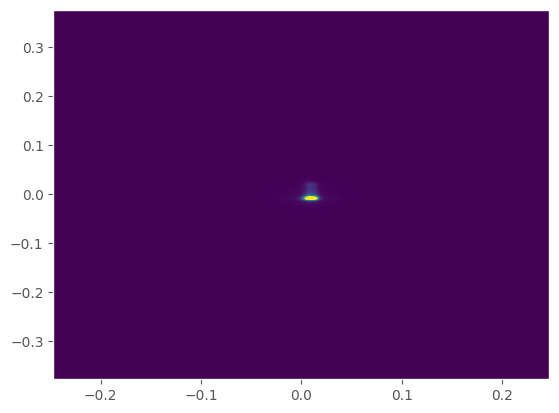

74 [0.0010282088250323164, 0.01316731177190838, 10.464950816343357]


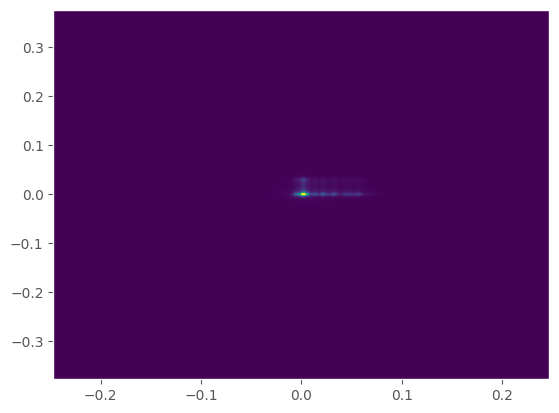

75 [0.007485158438956861, 0.01930159894284732, 8.986942987623676]


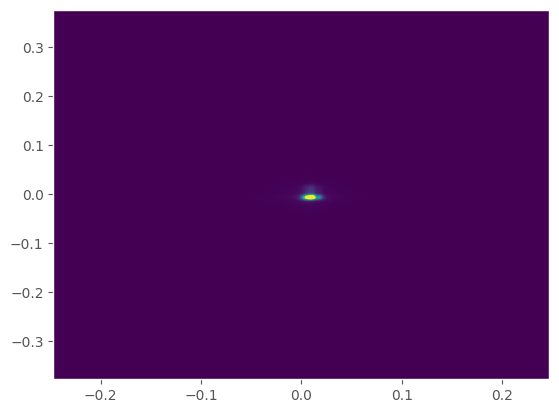

80 [0.00045981565522817996, 0.014613397338917686, 9.81599368346983]


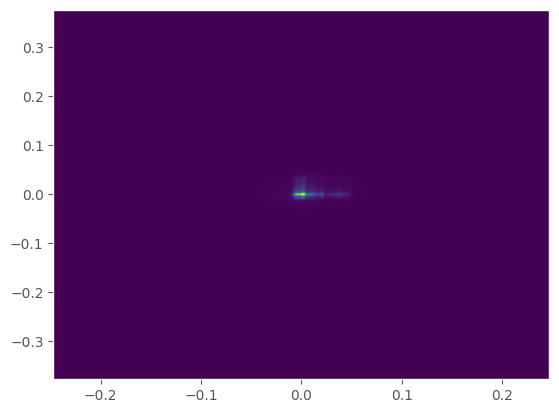

83 [0.009699755620155605, 0.01701935856999312, 9.235032427681148]


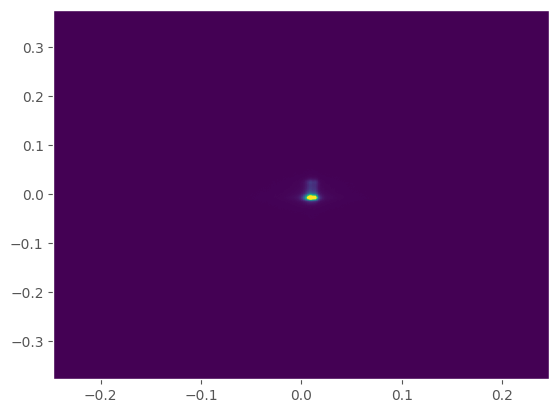

90 [0.0027969822618434796, 0.011073893725051806, 10.28537953142773]


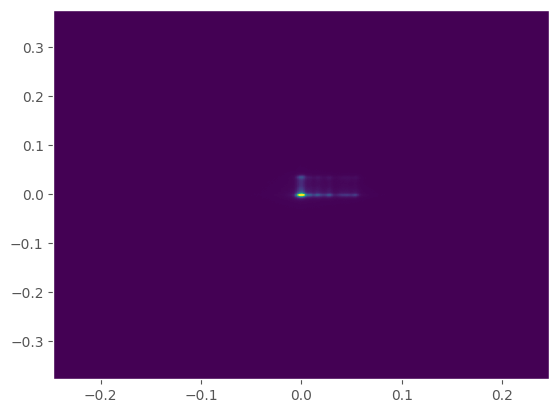

99 [0.006835404912380424, 0.021171436196469627, 9.481797461262829]


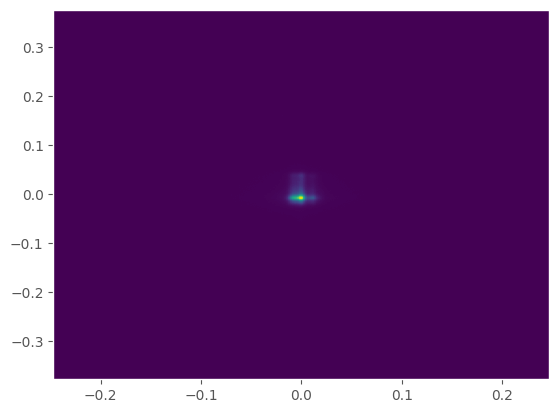

129 [0.012717677721576783, 0.010585784588079523, 11.199661955558447]


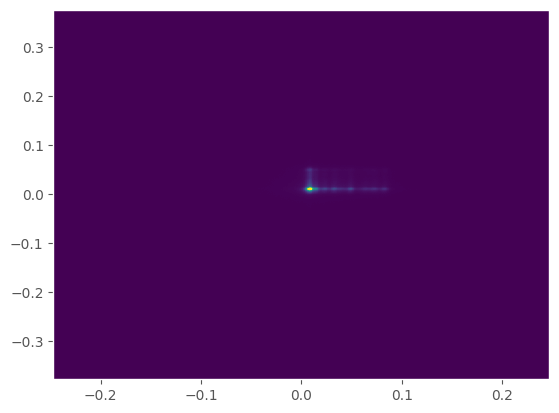

133 [0.006453853459412685, 0.014067849771378605, 9.658227856032969]


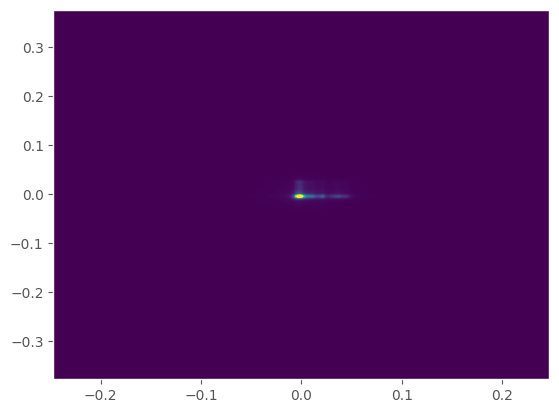

In [71]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()